In [1]:
import numpy as np
import os
import time
from vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
print (x.shape)
x = np.expand_dims(x, axis=0)
print (x.shape)
x = preprocess_input(x)
print('Input image shape:', x.shape)

(224, 224, 3)
(1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)


In [3]:
# Loading the testing  data
PATH = os.getcwd()
# Define data path
data_path = PATH + '/data'
#data_dir_list = os.listdir(data_path)
data_dir_list =['Cats','Dogs','Horses','Humans','Robots']
#data_dir_list.remove('.DS_Store')

In [4]:
img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		img_path = data_path + '/'+ dataset + '/'+ img
		img = image.load_img(img_path, target_size=(224, 224))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
#		x = x/255
		print('Input image shape:', x.shape)
		img_data_list.append(x)

Loaded the images of dataset-Cats

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 2

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 

In [5]:
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)


(1010, 1, 224, 224, 3)
(1, 1010, 224, 224, 3)
(1010, 224, 224, 3)


In [6]:
#providing labes to the classes
num_classes = 5
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:202]=0
labels[202:404]=1
labels[404:606]=2
labels[606:808]=3
labels[808:]=4
print (labels.shape)

(1010,)


In [7]:
names = data_dir_list

# convert class labels to on-hot encoding
Y_main = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
All_data_x,All_data_y = shuffle(img_data,Y_main, random_state=2)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(All_data_x,All_data_y, test_size=0.2, random_state=2)

In [8]:
print(img_data.shape)
X1=img_data[606:]
#X1=np.append([X1],[img_data[808:]],axis=1)[0]
print(X1.shape)
#New_num_classes = 2
#New_num_of_samples = X1.shape[0]
#New_labels = np.ones((New_num_of_samples,),dtype='int64')
#print(New_num_of_samples)

#New_labels[0:202]=2 # Horses
#New_labels[202:]=4 #Robots
#print(New_labels.shape)
#New_names = ['Horses','Robots']

# convert class labels to on-hot encoding
New_Y=Y_main[606:][:]

#New_Y = np.append(Y_main[0:202][:],Y_main[808:][:],axis=0)
print(New_Y.shape)
#Shuffle the dataset
new_test_x,new_test_y = shuffle(X1,New_Y, random_state=2)



(1010, 224, 224, 3)
(404, 224, 224, 3)
(404, 5)


In [118]:
#-----------------------------------AugData-------------------------------------------
print("1 for 1.\n2 for 5.\n3 for 10.\n4 for 20.")
y=input('enter a value for number of original example.')
y=int(y)

original_example=0
if(y==1):
    original_example=1;
elif(y==2):
    original_example=5;
elif(y==3):
    original_example=10;
elif(y==4):
    original_example=20;


print("1 for 10.\n2 for 100.\n3 for 1000.\n4 for 10000.")
x=input('enter a value for number of total example.')
x=int(x)

total_example=0
if(x==1):
    total_example=10+original_example;
elif(x==2):
    total_example=100+original_example;
elif(x==3):
    total_example=1000+original_example;
elif(x==4):
    total_example=10000+original_example;


print(total_example)
print(2*total_example)
print(3*total_example)
print(4*total_example)


1 for 1.
2 for 5.
3 for 10.
4 for 20.
enter a value for number of original example.4
1 for 10.
2 for 100.
3 for 1000.
4 for 10000.
enter a value for number of total example.2
120
240
360
480


In [119]:
# loading augmented data
if(y==1): 
    if(x==1):
        data_path_aug = PATH + '/DataAug1-10'
    elif(x==2):
        data_path_aug = PATH + '/DataAug1-100'
    elif(x==3):
        data_path_aug = PATH + '/DataAug1-1000'
    elif(x==4):
        data_path_aug = PATH + '/DataAug1-10000'
elif(y==2): 
    if(x==1):
        data_path_aug = PATH + '/DataAug5-10'
    elif(x==2):
        data_path_aug = PATH + '/DataAug5-100'
    elif(x==3):
        data_path_aug = PATH + '/DataAug5-1000'
    elif(x==4):
        data_path_aug = PATH + '/DataAug5-10000'
elif(y==3): 
    if(x==1):
        data_path_aug = PATH + '/DataAug10-10'
    elif(x==2):
        data_path_aug = PATH + '/DataAug10-100'
    elif(x==3):
        data_path_aug = PATH + '/DataAug10-1000'
    elif(x==4):
        data_path_aug = PATH + '/DataAug10-10000'
elif(y==4): 
    if(x==1):
        data_path_aug = PATH + '/DataAug20-10'
    elif(x==2):
        data_path_aug = PATH + '/DataAug20-100'
    elif(x==3):
        data_path_aug = PATH + '/DataAug20-1000'
    elif(x==4):
        data_path_aug = PATH + '/DataAug20-10000'
#data_path_aug = PATH + '/DataAug'

data_dir_list_aug = data_dir_list 
#data_dir_list.remove('.DS_Store')

img_data_list_aug=[]

for dataset in data_dir_list_aug:
	img_list=os.listdir(data_path_aug+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		img_path = data_path_aug + '/'+ dataset + '/'+ img
		img = image.load_img(img_path, target_size=(224, 224))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
#		x = x/255
		print('Input image shape:', x.shape)
		img_data_list_aug.append(x)
        
img_data_aug = np.array(img_data_list_aug)
#img_data = img_data.astype('float32')
print (img_data_aug.shape)
img_data_aug=np.rollaxis(img_data_aug,1,0)
print (img_data_aug.shape)
img_data_aug=img_data_aug[0]
print (img_data_aug.shape)

num_classes = 5
num_of_samples_aug = img_data_aug.shape[0]
labels_aug = np.ones((num_of_samples_aug,),dtype='int64')



Loaded the images of dataset-Cats

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 2

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Loaded the images of dataset-Horses

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224,

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 

In [120]:
# Labeling Augmented data

labels_aug[0:total_example]=0
labels_aug[total_example:2*total_example]=1
labels_aug[2*total_example:3*total_example]=2
labels_aug[3*total_example:4*total_example]=3
labels_aug[4*total_example:]=4
print(labels_aug.shape)

(600,)


In [121]:
names = data_dir_list_aug
num_classes=5
# convert class labels to on-hot encoding
Y_aug = np_utils.to_categorical(labels_aug, num_classes)

#Shuffle the dataset
x_aug,y_aug = shuffle(img_data_aug,Y_aug, random_state=2)


In [122]:
#########################################################################################
# Custom_vgg_model_1
#Training the classifier alone
image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()
last_layer = model.get_layer('fc2').output
#x= Flatten(name='flatten')(last_layer)


#Adding new last layer to the vvg16
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
print("--------------------------------New Model----------------------------------")
custom_vgg_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
# Freezing every layer except the last layer
for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False
custom_vgg_model.summary()

#custom_vgg_model.layers[3].trainable


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
#Giving hyperparameter and compiling the model
custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:

#Traning and predicting with the new model
t=time.time()
#	t = now()
hist = custom_vgg_model.fit(x_aug, y_aug, batch_size=10, epochs=20, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (time.time()-t))
(loss, accuracy) = custom_vgg_model.evaluate(All_data_x, All_data_y, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


Train on 600 samples, validate on 202 samples
Epoch 1/20
600/600 [==============================] - 27s 46ms/step - loss: 0.4136 - acc: 0.8617 - val_loss: 0.2082 - val_acc: 0.9307
Epoch 2/20
600/600 [==============================] - 24s 40ms/step - loss: 0.0632 - acc: 0.9750 - val_loss: 0.3115 - val_acc: 0.9158
Epoch 3/20
600/600 [==============================] - 25s 42ms/step - loss: 0.0127 - acc: 0.9967 - val_loss: 0.2559 - val_acc: 0.9356
Epoch 4/20
600/600 [==============================] - 24s 40ms/step - loss: 0.0090 - acc: 1.0000 - val_loss: 0.3311 - val_acc: 0.9307
Epoch 5/20
600/600 [==============================] - 24s 40ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3281 - val_acc: 0.9307
Epoch 6/20
600/600 [==============================] - 24s 40ms/step - loss: 3.6688e-04 - acc: 1.0000 - val_loss: 0.3369 - val_acc: 0.9406
Epoch 7/20
600/600 [==============================] - 25s 42ms/step - loss: 2.6290e-04 - acc: 1.0000 - val_loss: 0.4169 - val_acc: 0.9406
Epoch 8/

In [ ]:
#only predicting on robot and human

(loss_on_novel, accuracy_on_novel) = custom_vgg_model.evaluate(new_test_x, new_test_y, batch_size=20, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss_on_novel,accuracy_on_novel * 100))


In [47]:
####################################################################################################################

#Training the feature extraction also

image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [48]:
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model2 = Model(image_input, out)
custom_vgg_model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [28]:

# freeze all the layers except the dense layers
for layer in custom_vgg_model2.layers[:-3]:
	layer.trainable = False

custom_vgg_model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [29]:
custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

In [30]:

t=time.time()
#	t = now()
hist = custom_vgg_model2.fit(x_aug,Y_aug, batch_size=100, epochs=15, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(All_data_x, All_data_y, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


Train on 5025 samples, validate on 202 samples
Epoch 1/15
5025/5025 [==============================] - 130s 26ms/step - loss: 12.6666 - acc: 0.2038 - val_loss: 12.4476 - val_acc: 0.2277
Epoch 2/15
5025/5025 [==============================] - 131s 26ms/step - loss: 12.8232 - acc: 0.2022 - val_loss: 12.4476 - val_acc: 0.2277
Epoch 3/15
5025/5025 [==============================] - 128s 26ms/step - loss: 12.7969 - acc: 0.2020 - val_loss: 12.4476 - val_acc: 0.2277
Epoch 4/15
5025/5025 [==============================] - 126s 25ms/step - loss: 12.4939 - acc: 0.2121 - val_loss: 12.1846 - val_acc: 0.2426
Epoch 5/15
5025/5025 [==============================] - 122s 24ms/step - loss: 12.6296 - acc: 0.2094 - val_loss: 13.0062 - val_acc: 0.1931
Epoch 6/15
5025/5025 [==============================] - 130s 26ms/step - loss: 12.8945 - acc: 0.2000 - val_loss: 13.0062 - val_acc: 0.1931
Epoch 7/15
5025/5025 [==============================] - 130s 26ms/step - loss: 12.8945 - acc: 0.2000 - val_loss: 13.006

In [36]:
#only predicting on robot and horse
(loss_on_novel, accuracy_on_novel) = custom_vgg_model2.evaluate(new_test_x, new_test_y, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss_on_novel,accuracy_on_novel * 100))



404/404 [==============================] - 10s 26ms/step
[INFO] loss=16.1181, accuracy: 0.0000%


In [31]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(15)

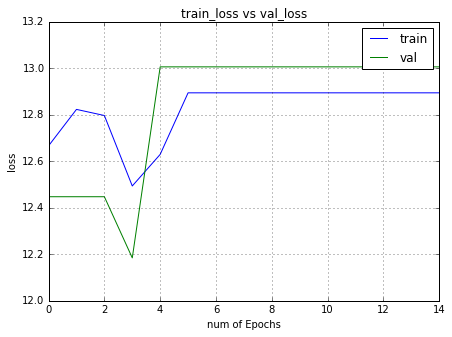

In [32]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


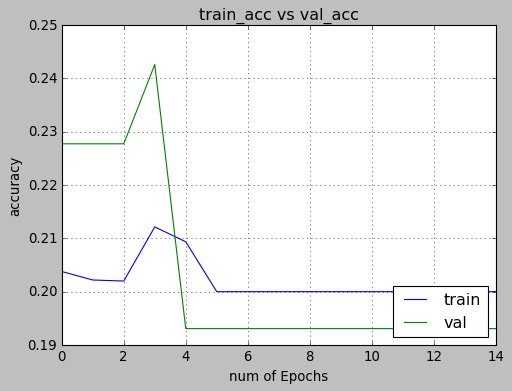

In [33]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

